## Simple Linear Regression


Data Preview (First 5 rows of the dataset):
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0



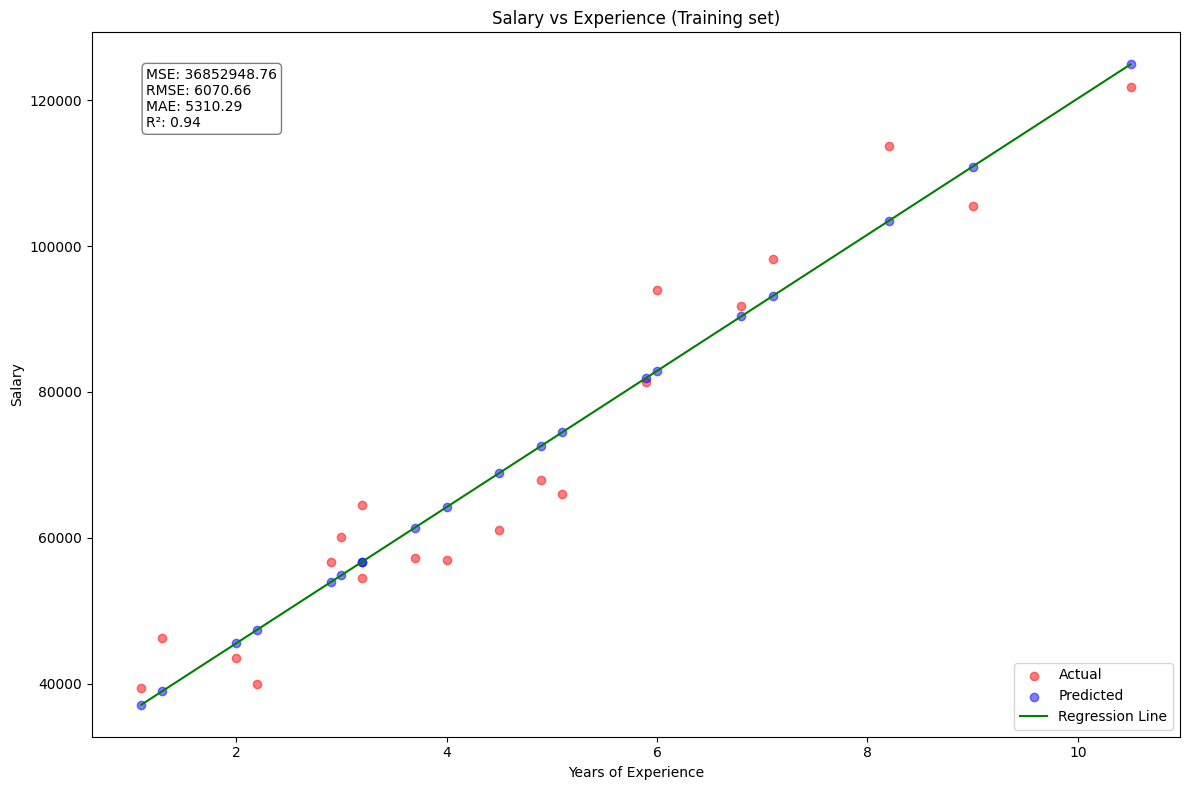

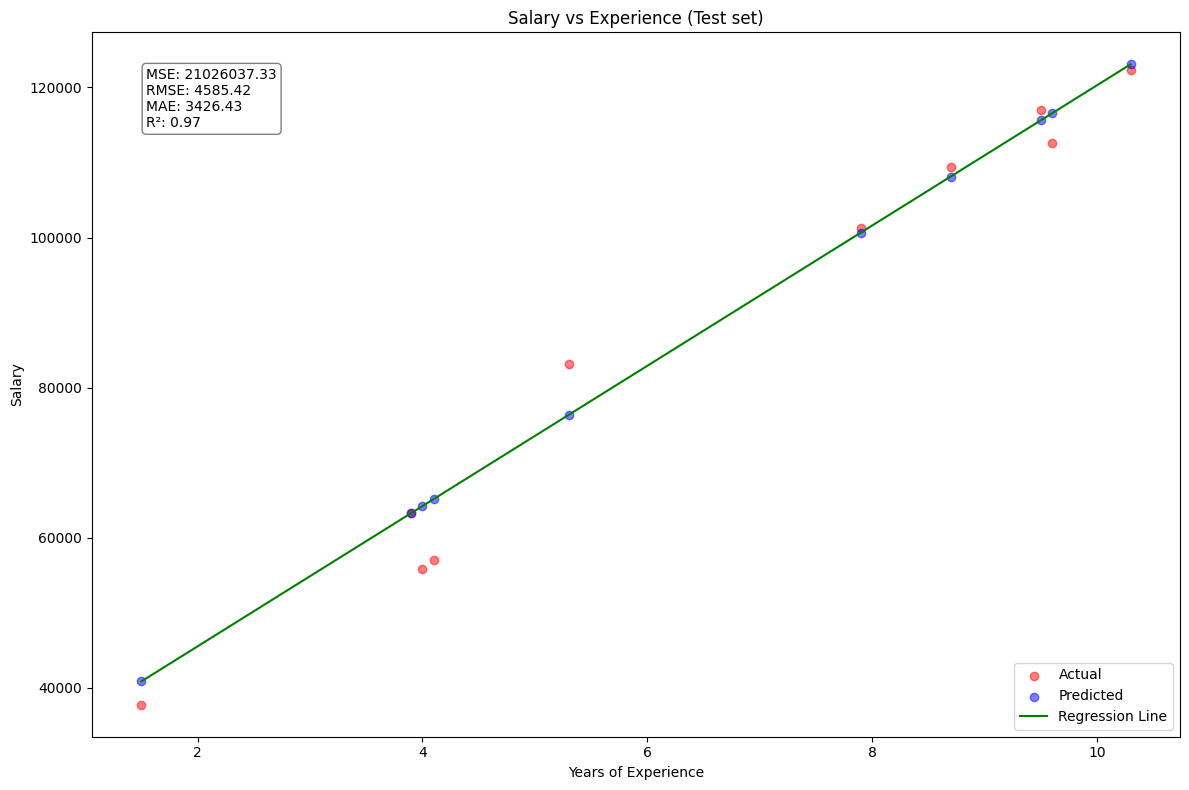

Training Set Metrics:
Mean Squared Error: 36852948.76
Root Mean Squared Error: 6070.66
Mean Absolute Error: 5310.29
R-squared Score: 0.94

Test Set Metrics:
Mean Squared Error: 21026037.33
Root Mean Squared Error: 4585.42
Mean Absolute Error: 3426.43
R-squared Score: 0.97

Model Coefficient (Slope): 9345.94
Model Intercept: 26816.19


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Load and prepare the data
df = pd.read_csv('raw_data/Salary_Data.csv')

# Print a box around the data preview
print("\n" + "="*50)
print("Data Preview (First 5 rows of the dataset):")
print("="*50)
print(df.head())
print("="*50 + "\n")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Create and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Function to create plot
def create_plot(X, y, y_pred, title, metrics):
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, color='red', alpha=0.5, label='Actual')
    plt.scatter(X, y_pred, color='blue', alpha=0.5, label='Predicted')
    
    # Sort X for smooth line plot
    sort_idx = X.ravel().argsort()
    plt.plot(X[sort_idx], y_pred[sort_idx], color='green', label='Regression Line')
    
    plt.title(title)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    
    # Add metrics to the plot
    plt.text(0.05, 0.95, f'MSE: {metrics["mse"]:.2f}\n'
                         f'RMSE: {metrics["rmse"]:.2f}\n'
                         f'MAE: {metrics["mae"]:.2f}\n'
                         f'R²: {metrics["r2"]:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.tight_layout()

# Create plot for training set
create_plot(X_train, y_train, y_train_pred, 'Salary vs Experience (Training set)', 
            {"mse": train_mse, "rmse": train_rmse, "mae": train_mae, "r2": train_r2})
plt.savefig('outputs/simple_linear_regression_training.png')
plt.show()

# Create plot for test set
create_plot(X_test, y_test, y_test_pred, 'Salary vs Experience (Test set)', 
            {"mse": test_mse, "rmse": test_rmse, "mae": test_mae, "r2": test_r2})
plt.savefig('outputs/simple_linear_regression_test.png')
plt.show()

# Print metrics
print("Training Set Metrics:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"Root Mean Squared Error: {train_rmse:.2f}")
print(f"Mean Absolute Error: {train_mae:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"Root Mean Squared Error: {test_rmse:.2f}")
print(f"Mean Absolute Error: {test_mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

# Print model coefficients
print(f"\nModel Coefficient (Slope): {regressor.coef_[0]:.2f}")
print(f"Model Intercept: {regressor.intercept_:.2f}")

# Save metrics to a file
with open('outputs/simple_linear_regression_metrics.txt', 'w') as f:
    f.write("Training Set Metrics:\n")
    f.write(f"Mean Squared Error: {train_mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {train_rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {train_mae:.2f}\n")
    f.write(f"R-squared Score: {train_r2:.2f}\n\n")
    f.write("Test Set Metrics:\n")
    f.write(f"Mean Squared Error: {test_mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {test_rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {test_mae:.2f}\n")
    f.write(f"R-squared Score: {test_r2:.2f}\n\n")
    f.write(f"Model Coefficient (Slope): {regressor.coef_[0]:.2f}\n")
    f.write(f"Model Intercept: {regressor.intercept_:.2f}\n")

## Multiple Linear Regression


Data Preview (First 5 rows of the dataset):
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

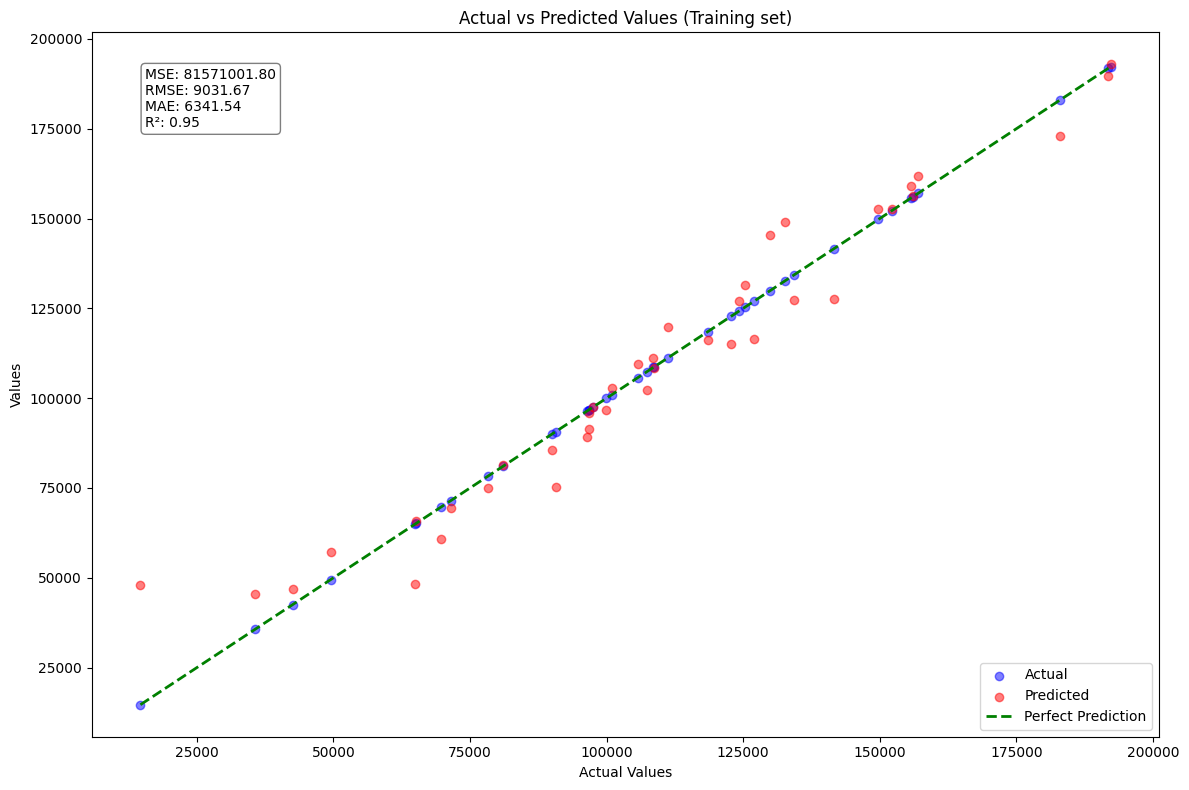

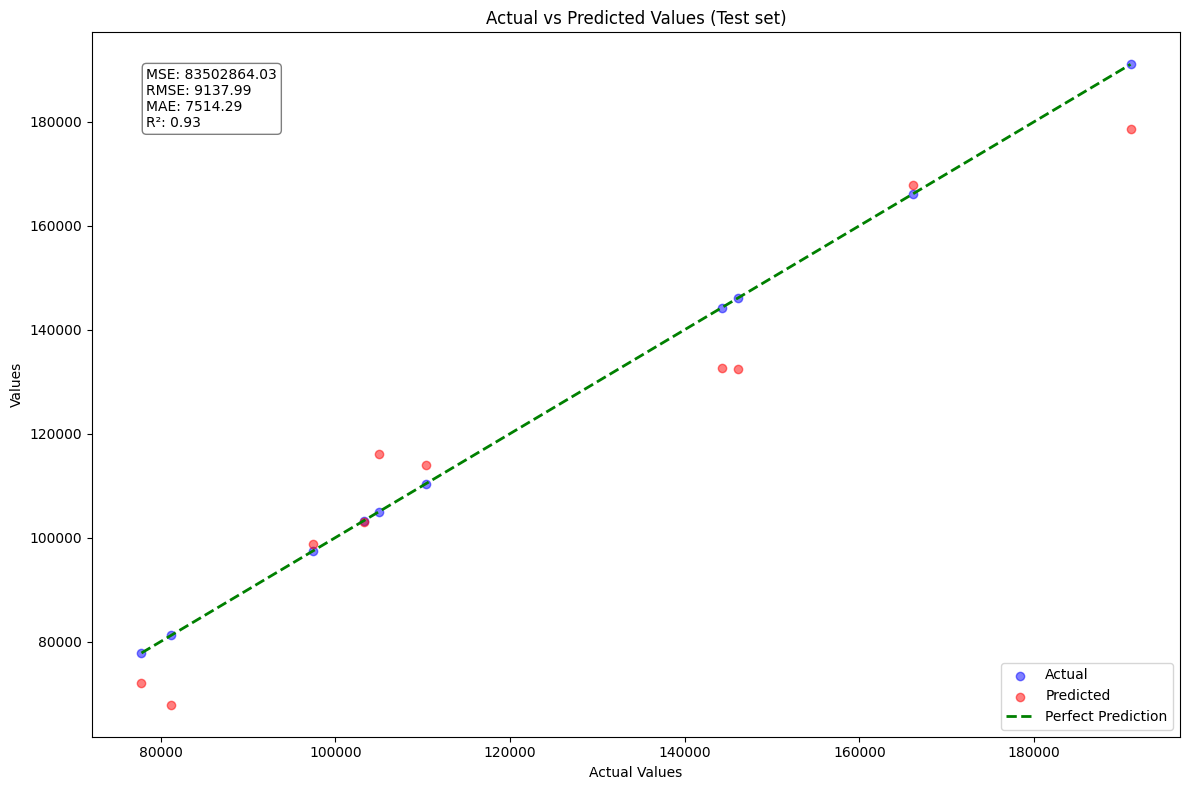

Training Set Metrics:
Mean Squared Error: 81571001.80
Root Mean Squared Error: 9031.67
Mean Absolute Error: 6341.54
R-squared Score: 0.95

Test Set Metrics:
Mean Squared Error: 83502864.03
Root Mean Squared Error: 9137.99
Mean Absolute Error: 7514.29
R-squared Score: 0.93


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Load the CSV file 
df = pd.read_csv('raw_data/50_Startups.csv')

# Print a box around the data preview
print("\n" + "="*50)
print("Data Preview (First 5 rows of the dataset):")
print("="*50)
print(df.head())
print("="*50 + "\n")

# Generate the profiling report
profile = ProfileReport(df, title="50 Startups Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("outputs/50_Startups_Profile_Report.html")

# Diplay the Report
profile.to_notebook_iframe()

# Define the Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode categorical variable
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train Multiple Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict results for test set
y_pred = regressor.predict(X_test)

# Function to create plot
def create_plot(X, y, y_pred, title):
    plt.figure(figsize=(12, 8))
    plt.scatter(y, y, color='blue', alpha=0.5, label='Actual')
    plt.scatter(y, y_pred, color='red', alpha=0.5, label='Predicted')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'g--', lw=2, label='Perfect Prediction')

    plt.xlabel('Actual Values')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()

    # Calculate error metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Add error metrics to the plot
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.tight_layout()
    
    return mse, rmse, mae, r2

# Create plot for training set
y_train_pred = regressor.predict(X_train)
train_mse, train_rmse, train_mae, train_r2 = create_plot(X_train, y_train, y_train_pred, 'Actual vs Predicted Values (Training set)')
plt.savefig('outputs/multiple_linear_regression_training.png')
plt.show()

# Create plot for test set
test_mse, test_rmse, test_mae, test_r2 = create_plot(X_test, y_test, y_pred, 'Actual vs Predicted Values (Test set)')
plt.savefig('outputs/multiple_linear_regression_test.png')
plt.show()

# Print metrics
print("Training Set Metrics:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"Root Mean Squared Error: {train_rmse:.2f}")
print(f"Mean Absolute Error: {train_mae:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"Root Mean Squared Error: {test_rmse:.2f}")
print(f"Mean Absolute Error: {test_mae:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

# Save metrics to a file
with open('outputs/multiple_linear_regression_metrics.txt', 'w') as f:
    f.write("Training Set Metrics:\n")
    f.write(f"Mean Squared Error: {train_mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {train_rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {train_mae:.2f}\n")
    f.write(f"R-squared Score: {train_r2:.2f}\n\n")
    f.write("Test Set Metrics:\n")
    f.write(f"Mean Squared Error: {test_mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {test_rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {test_mae:.2f}\n")
    f.write(f"R-squared Score: {test_r2:.2f}\n")

## Polinomial Regression


Data Preview (First 5 rows of the dataset):
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000



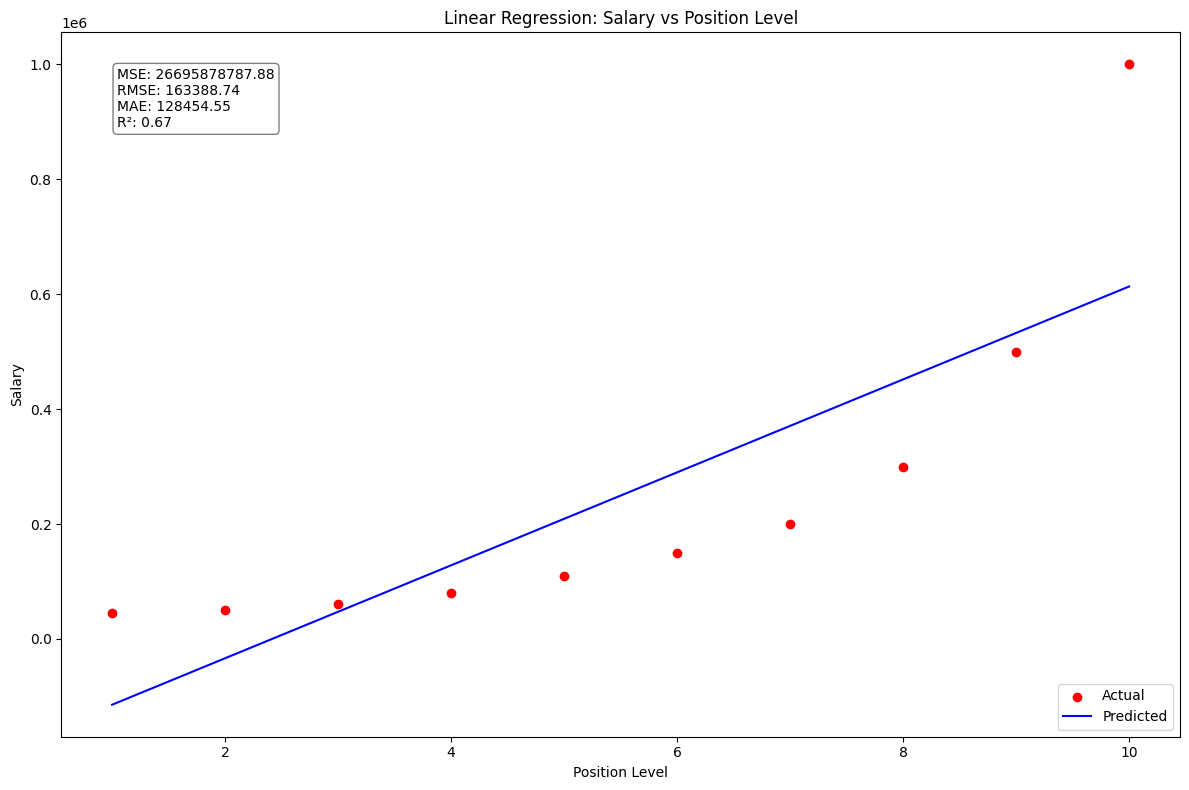

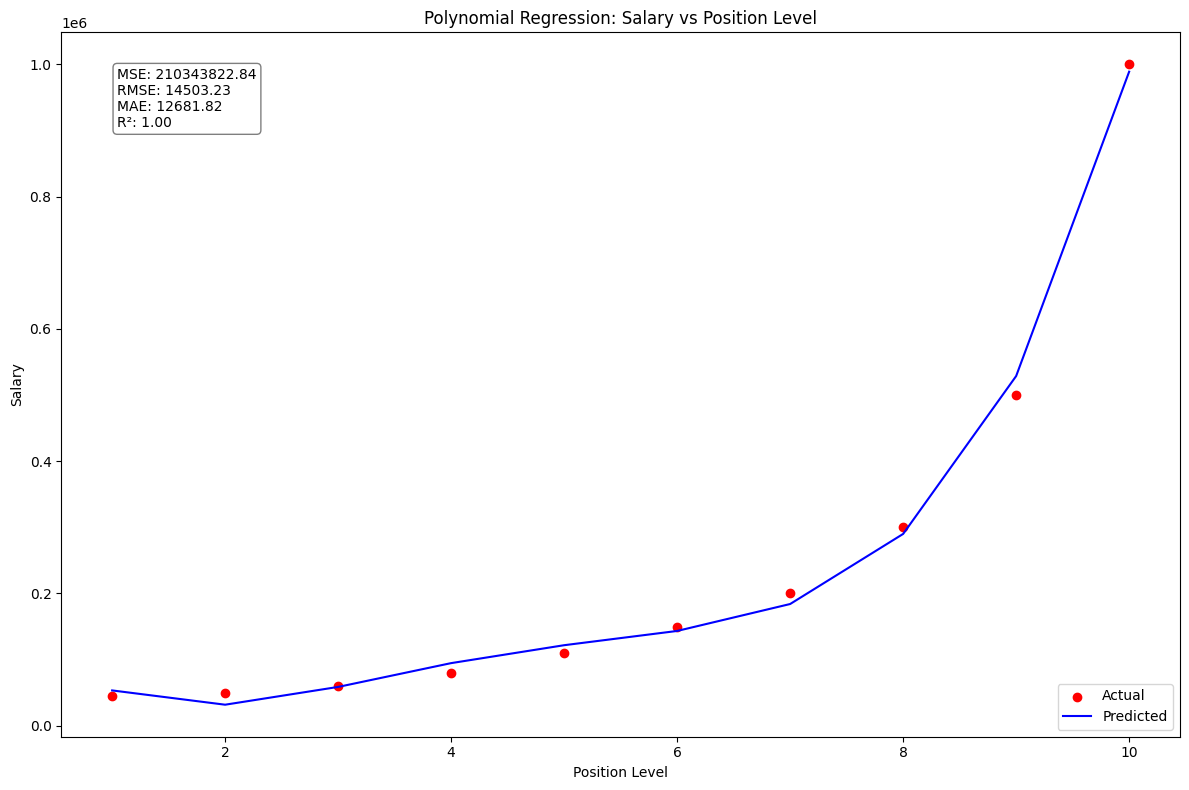

/tmp/ipykernel_42616/3452333707.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


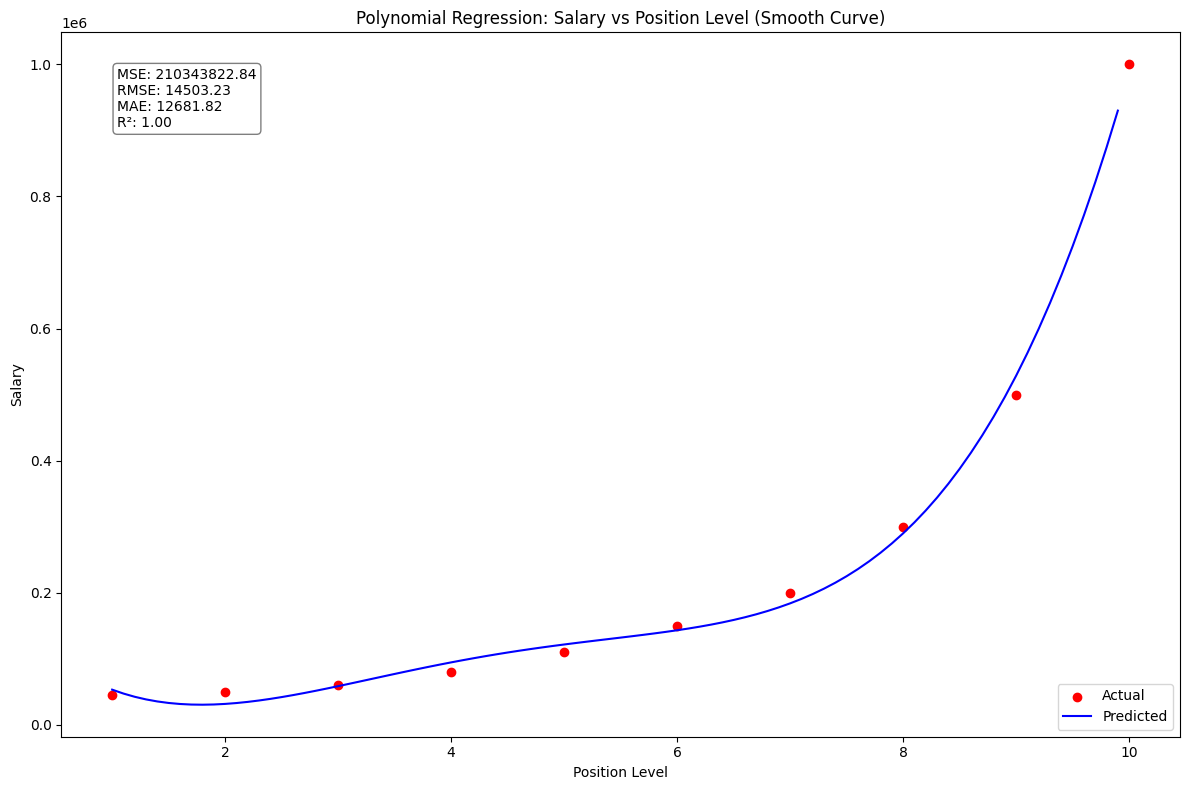

Linear Regression Metrics:
Mean Squared Error: 26695878787.88
Root Mean Squared Error: 163388.74
Mean Absolute Error: 128454.55
R-squared Score: 0.67

Polynomial Regression Metrics:
Mean Squared Error: 210343822.84
Root Mean Squared Error: 14503.23
Mean Absolute Error: 12681.82
R-squared Score: 1.00

Predictions for position level 6.5:
Linear Regression: 330378.79
Polynomial Regression: 158862.45


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from ydata_profiling import ProfileReport
%matplotlib inline

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Import dataset
dataset = pd.read_csv('raw_data/Position_Salaries.csv')

# Print a box around the data preview
print("\n" + "="*50)
print("Data Preview (First 5 rows of the dataset):")
print("="*50)
print(dataset.head())
print("="*50 + "\n")

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Train the Polynomial Regression model
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Function to create plot
def create_plot(X, y, model, poly_reg, title, is_polynomial=False, smooth=False):
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, color='red', label='Actual')
    
    if smooth:
        X_grid = np.arange(min(X), max(X), 0.1)
        X_grid = X_grid.reshape((len(X_grid), 1))
    else:
        X_grid = X
    
    if is_polynomial:
        y_pred = model.predict(poly_reg.transform(X_grid))
    else:
        y_pred = model.predict(X_grid)
    
    plt.plot(X_grid, y_pred, color='blue', label='Predicted')

    plt.title(title)
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.legend()

    # Calculate error metrics
    y_pred_original = model.predict(X_poly) if is_polynomial else model.predict(X)
    mse = mean_squared_error(y, y_pred_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred_original)
    r2 = r2_score(y, y_pred_original)

    # Add error metrics to the plot
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.tight_layout()
    
    return mse, rmse, mae, r2

# Create plots and calculate metrics
lin_mse, lin_rmse, lin_mae, lin_r2 = create_plot(X, y, lin_reg, poly_reg, 'Linear Regression: Salary vs Position Level')
plt.savefig('outputs/polynomial_regression_linear.png')
plt.show()

poly_mse, poly_rmse, poly_mae, poly_r2 = create_plot(X, y, lin_reg_2, poly_reg, 'Polynomial Regression: Salary vs Position Level', is_polynomial=True)
plt.savefig('outputs/polynomial_regression_polynomial.png')
plt.show()

create_plot(X, y, lin_reg_2, poly_reg, 'Polynomial Regression: Salary vs Position Level (Smooth Curve)', is_polynomial=True, smooth=True)
plt.savefig('outputs/polynomial_regression_smooth.png')
plt.show()

# Print metrics
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {lin_mse:.2f}")
print(f"Root Mean Squared Error: {lin_rmse:.2f}")
print(f"Mean Absolute Error: {lin_mae:.2f}")
print(f"R-squared Score: {lin_r2:.2f}")

print("\nPolynomial Regression Metrics:")
print(f"Mean Squared Error: {poly_mse:.2f}")
print(f"Root Mean Squared Error: {poly_rmse:.2f}")
print(f"Mean Absolute Error: {poly_mae:.2f}")
print(f"R-squared Score: {poly_r2:.2f}")

# Predictions for position level 6.5
print("\nPredictions for position level 6.5:")
print(f"Linear Regression: {lin_reg.predict([[6.5]])[0]:.2f}")
print(f"Polynomial Regression: {lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))[0]:.2f}")

# Save metrics and predictions to a text file
with open('outputs/polynomial_regression_results.txt', 'w') as f:
    f.write("Linear Regression Metrics:\n")
    f.write(f"Mean Squared Error: {lin_mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {lin_rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {lin_mae:.2f}\n")
    f.write(f"R-squared Score: {lin_r2:.2f}\n\n")

    f.write("Polynomial Regression Metrics:\n")
    f.write(f"Mean Squared Error: {poly_mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {poly_rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {poly_mae:.2f}\n")
    f.write(f"R-squared Score: {poly_r2:.2f}\n\n")

    f.write("Predictions for position level 6.5:\n")
    f.write(f"Linear Regression: {lin_reg.predict([[6.5]])[0]:.2f}\n")
    f.write(f"Polynomial Regression: {lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))[0]:.2f}\n")

## Support Vector Regression


Data Preview (First 5 rows of the dataset):
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

Original X values:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Original y values:
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]

Scaled X values:
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

Scaled y values:
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


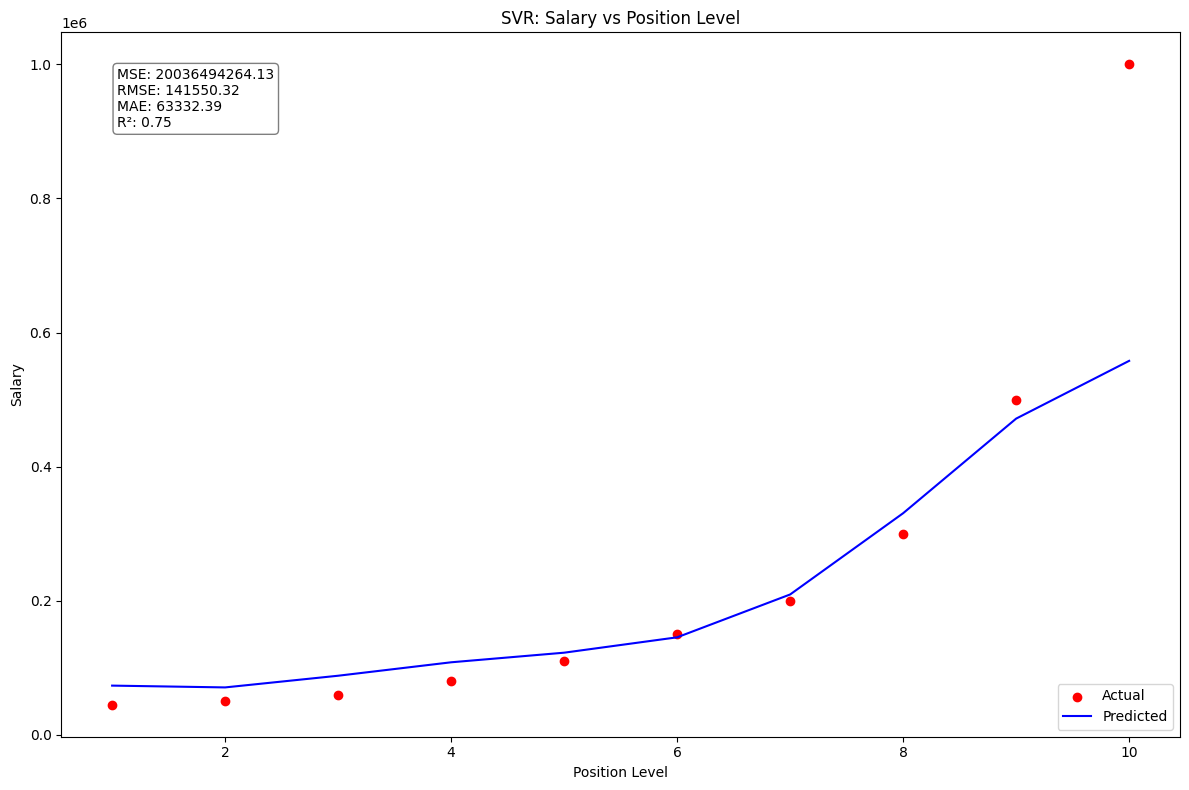

/tmp/ipykernel_42616/1562689502.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


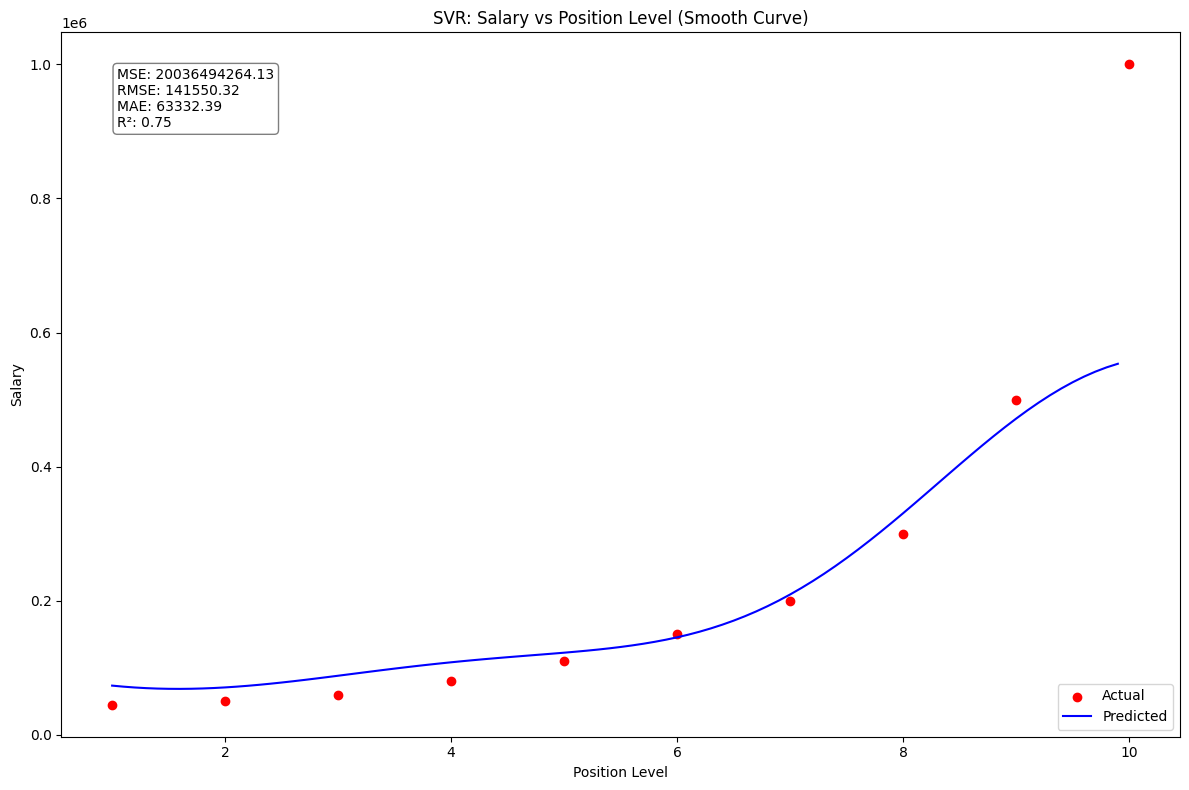


SVR Metrics:
Mean Squared Error: 20036494264.13
Root Mean Squared Error: 141550.32
Mean Absolute Error: 63332.39
R-squared Score: 0.75

Prediction for position level 6.5: 170370.02


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
%matplotlib inline

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Import dataset
dataset = pd.read_csv('raw_data/Position_Salaries.csv')

# Print 5 rows from the dataset
print("\nData Preview (First 5 rows of the dataset):")
print("="*50)
print(dataset.head())
print("="*50 + "\n")

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print("Original X values:")
print(X)
print("\nOriginal y values:")
print(y)

# Reshape y
y = y.reshape(len(y), 1)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

print("\nScaled X values:")
print(X_scaled)
print("\nScaled y values:")
print(y_scaled)

# Train the SVR model
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled.ravel())

# Function to create plot
def create_plot(X, y, model, sc_X, sc_y, title, smooth=False, filename=None):
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, color='red', label='Actual')
    
    if smooth:
        X_grid = np.arange(min(X), max(X), 0.1)
        X_grid = X_grid.reshape((len(X_grid), 1))
    else:
        X_grid = X
    
    y_pred = sc_y.inverse_transform(model.predict(sc_X.transform(X_grid)).reshape(-1, 1))
    
    plt.plot(X_grid, y_pred, color='blue', label='Predicted')

    plt.title(title)
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.legend()

    # Calculate error metrics
    y_pred_original = sc_y.inverse_transform(model.predict(sc_X.transform(X)).reshape(-1, 1))
    mse = mean_squared_error(y, y_pred_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred_original)
    r2 = r2_score(y, y_pred_original)

    # Add error metrics to the plot
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.tight_layout()
    
    if filename:
        plt.savefig(f'outputs/{filename}')
    
    plt.show()
    
    return mse, rmse, mae, r2

# Create plots and calculate metrics
mse, rmse, mae, r2 = create_plot(X, y, regressor, sc_X, sc_y, 'SVR: Salary vs Position Level', filename='svr_plot.png')
create_plot(X, y, regressor, sc_X, sc_y, 'SVR: Salary vs Position Level (Smooth Curve)', smooth=True, filename='svr_smooth_plot.png')

# Print metrics
print("\nSVR Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Prediction for position level 6.5
prediction = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))[0][0]
print(f"\nPrediction for position level 6.5: {prediction:.2f}")

# Save metrics and prediction to a text file
with open('outputs/svr_results.txt', 'w') as f:
    f.write("SVR Metrics:\n")
    f.write(f"Mean Squared Error: {mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {mae:.2f}\n")
    f.write(f"R-squared Score: {r2:.2f}\n\n")
    f.write(f"Prediction for position level 6.5: {prediction:.2f}\n")

## Decision Tree Regression


Data Preview (First 5 rows of the dataset):
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

Original X values:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Original y values:
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


/tmp/ipykernel_42616/878826857.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


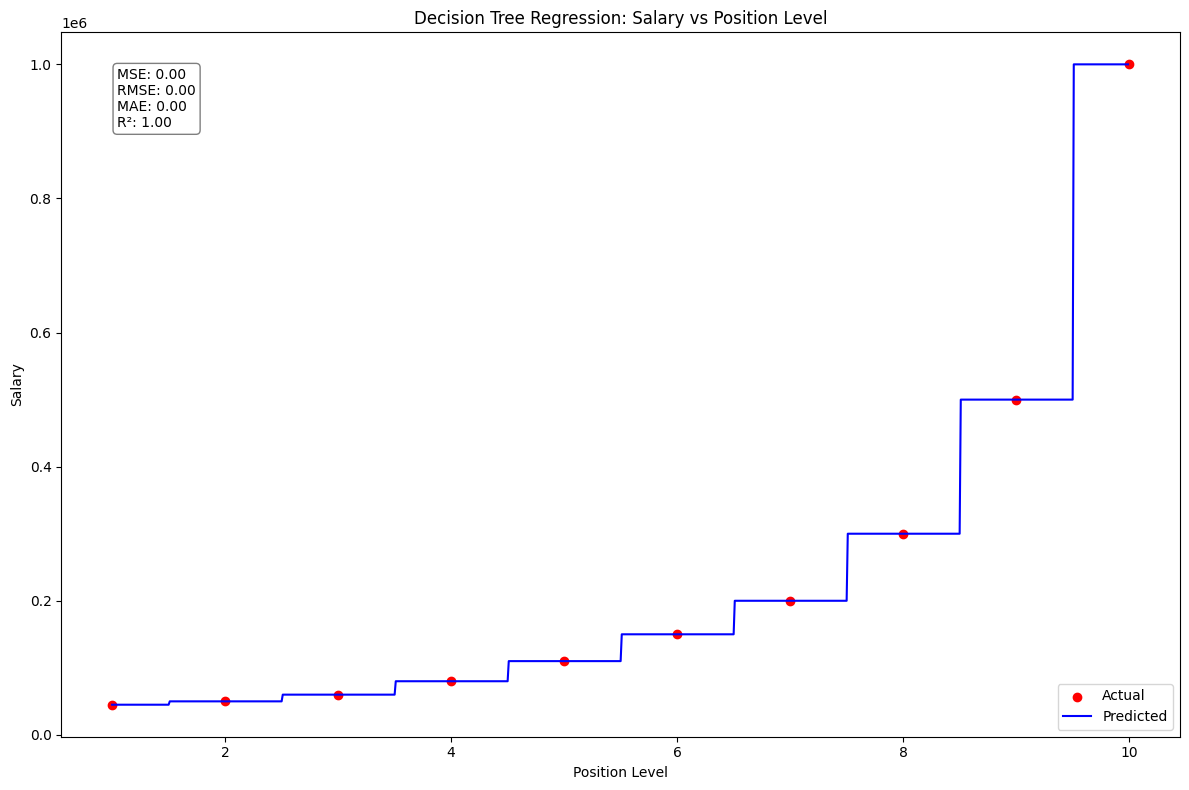


Decision Tree Regression Metrics:
Mean Squared Error: 0.00
Root Mean Squared Error: 0.00
Mean Absolute Error: 0.00
R-squared Score: 1.00

Prediction for position level 6.5: 150000.00


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
%matplotlib inline

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Import dataset
dataset = pd.read_csv('raw_data/Position_Salaries.csv')

# Print 5 rows from the dataset
print("\nData Preview (First 5 rows of the dataset):")
print("="*50)
print(dataset.head())
print("="*50 + "\n")

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print("Original X values:")
print(X)
print("\nOriginal y values:")
print(y)

# Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Function to create plot
def create_plot(X, y, model, title, filename=None):
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, color='red', label='Actual')
    
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    y_pred = model.predict(X_grid)
    
    plt.plot(X_grid, y_pred, color='blue', label='Predicted')

    plt.title(title)
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.legend()

    # Calculate error metrics
    y_pred_original = model.predict(X)
    mse = mean_squared_error(y, y_pred_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred_original)
    r2 = r2_score(y, y_pred_original)

    # Add error metrics to the plot
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.tight_layout()
    
    if filename:
        plt.savefig(f'outputs/{filename}')
    
    plt.show()
    
    return mse, rmse, mae, r2

# Create plot and calculate metrics
mse, rmse, mae, r2 = create_plot(X, y, regressor, 'Decision Tree Regression: Salary vs Position Level', filename='decision_tree_plot.png')

# Print metrics
print("\nDecision Tree Regression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Prediction for position level 6.5
prediction = regressor.predict([[6.5]])[0]
print(f"\nPrediction for position level 6.5: {prediction:.2f}")

# Save metrics and prediction to a text file
with open('outputs/decision_tree_results.txt', 'w') as f:
    f.write("Decision Tree Regression Metrics:\n")
    f.write(f"Mean Squared Error: {mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {mae:.2f}\n")
    f.write(f"R-squared Score: {r2:.2f}\n\n")
    f.write(f"Prediction for position level 6.5: {prediction:.2f}\n")

## Random Forest Regression


Data Preview (First 5 rows of the dataset):
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

Original X values:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Original y values:
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


/tmp/ipykernel_42616/1523485428.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


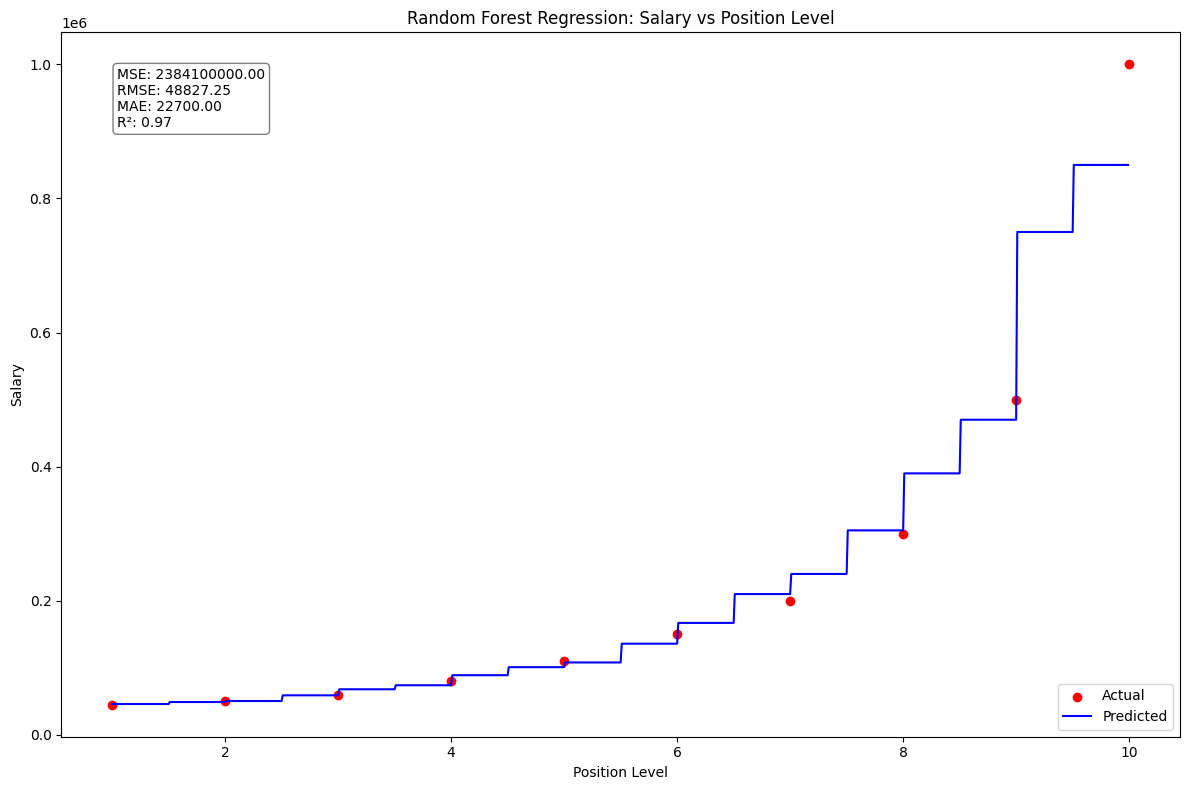


Random Forest Regression Metrics:
Mean Squared Error: 2384100000.00
Root Mean Squared Error: 48827.25
Mean Absolute Error: 22700.00
R-squared Score: 0.97

Prediction for position level 6.5: 167000.00


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
%matplotlib inline

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Import dataset
dataset = pd.read_csv('raw_data/Position_Salaries.csv')

# Print 5 rows from the dataset
print("\nData Preview (First 5 rows of the dataset):")
print("="*50)
print(dataset.head())
print("="*50 + "\n")

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print("Original X values:")
print(X)
print("\nOriginal y values:")
print(y)

# Train the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X, y)

# Function to create plot
def create_plot(X, y, model, title, filename=None):
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, color='red', label='Actual')
    
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    y_pred = model.predict(X_grid)
    
    plt.plot(X_grid, y_pred, color='blue', label='Predicted')

    plt.title(title)
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.legend()

    # Calculate error metrics
    y_pred_original = model.predict(X)
    mse = mean_squared_error(y, y_pred_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred_original)
    r2 = r2_score(y, y_pred_original)

    # Add error metrics to the plot
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.tight_layout()
    
    if filename:
        plt.savefig(f'outputs/{filename}')
    
    plt.show()
    
    return mse, rmse, mae, r2

# Create plot and calculate metrics
mse, rmse, mae, r2 = create_plot(X, y, regressor, 'Random Forest Regression: Salary vs Position Level', filename='random_forest_plot.png')

# Print metrics
print("\nRandom Forest Regression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Prediction for position level 6.5
prediction = regressor.predict([[6.5]])[0]
print(f"\nPrediction for position level 6.5: {prediction:.2f}")

# Save metrics and prediction to a text file
with open('outputs/random_forest_results.txt', 'w') as f:
    f.write("Random Forest Regression Metrics:\n")
    f.write(f"Mean Squared Error: {mse:.2f}\n")
    f.write(f"Root Mean Squared Error: {rmse:.2f}\n")
    f.write(f"Mean Absolute Error: {mae:.2f}\n")
    f.write(f"R-squared Score: {r2:.2f}\n\n")
    f.write(f"Prediction for position level 6.5: {prediction:.2f}\n")